In [ ]:
import pandas as pd
from sklearn.ensemble import RandomTreesEmbedding
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
crime_data_e = pd.read_excel("data_crime_econ.xlsx")
crime_data_e = crime_data_e.dropna()
crime_data_e.head()

,Years,inflation,"Criminal offences, total (%)",Offences excluding road traffic offences (%),Road traffic offences (%),Offences under Penal Code (excl. traffic) (%),"Offences against the state, public order (%)",Offences against sexual self-determination (%),Sexual abuse of children (%),Rape (%),...,Other property offences (%),Fraud (%),Forgery (%),"Off.c.common danger,off.ag.environm.(excl.traffic) (%)",Road traffic offences under the Penal Code (%),Offences under the Road Traffic Act (%),Offences under other federal or Land laws (%),Offences under the Narcotics Act (%),Offences under the Residence Act (%),GDP (%)
5,1981,6.344243,0.033087,0.079465,-0.028323,0.099242,0.071405,0.010969,-0.035589,-0.005344,...,0.134904,0.180881,0.103051,0.001043,-0.032955,-0.008921,-0.003577,0.002991,-0.235976,-0.029852
6,1982,5.241045,0.016140,0.037860,-0.015811,0.049528,0.027957,0.042156,-0.045372,0.023024,...,0.096028,0.139044,0.015507,-0.035722,0.000155,-0.081059,-0.016185,0.040748,-0.305790,-0.007587
7,1983,3.293415,-0.039839,-0.023693,-0.064884,-0.025330,-0.020168,-0.011094,-0.027250,-0.012753,...,0.050732,0.075581,-0.002057,-0.006372,-0.049875,-0.131640,-0.015604,0.026514,-0.118044,-0.059133
11,1987,0.200000,0.016488,0.018873,0.012377,0.015235,-0.018266,0.017291,0.076808,-0.043928,...,0.015882,-0.004074,0.045925,0.044068,0.013455,0.005268,0.036303,0.092594,-0.038481,0.079386
12,1988,1.274119,-0.013226,-0.020270,-0.001000,-0.031017,-0.015420,-0.020032,0.052632,-0.083784,...,-0.005961,0.008244,-0.040239,0.043497,-0.000976,-0.001161,0.030178,0.071247,0.265257,-0.001617


# **Crime Crime Analysis**

In this study, we investigate German crime rates over years.

### Exploring data

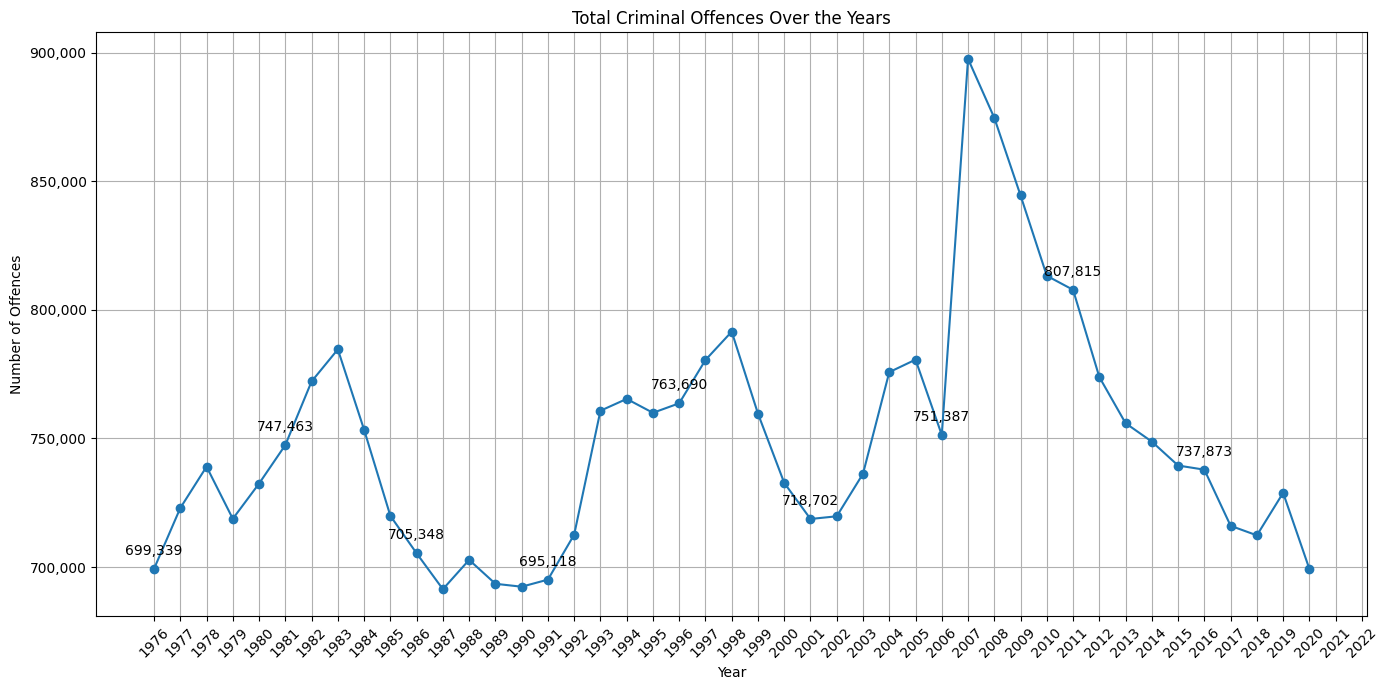

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


crime_data = pd.read_excel("data_crime.xlsx")
crime_data_transposed = crime_data.set_index('Type of criminal offence').transpose()
plt.figure(figsize=(14, 7))
plt.plot(crime_data_transposed.index, crime_data_transposed['Criminal offences, total'], marker='o')

for i, year in enumerate(crime_data_transposed.index):
    if i % 5 == 0:  # Every 5th year
        plt.annotate(f"{crime_data_transposed['Criminal offences, total'][year]:,.0f}",
                     (year, crime_data_transposed['Criminal offences, total'][year]),
                     textcoords="offset points",  #
                     xytext=(0,10),
                     ha='center')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Total Criminal Offences Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Offences')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Above graph we see German total crime rates over the years. Interestingly we observe a peak in 2008. First thing that we relate is 2008 economic crisis. People may tend to involve in crimes as they get poorer.


Firstly, we want to explore different crime types change over the years.

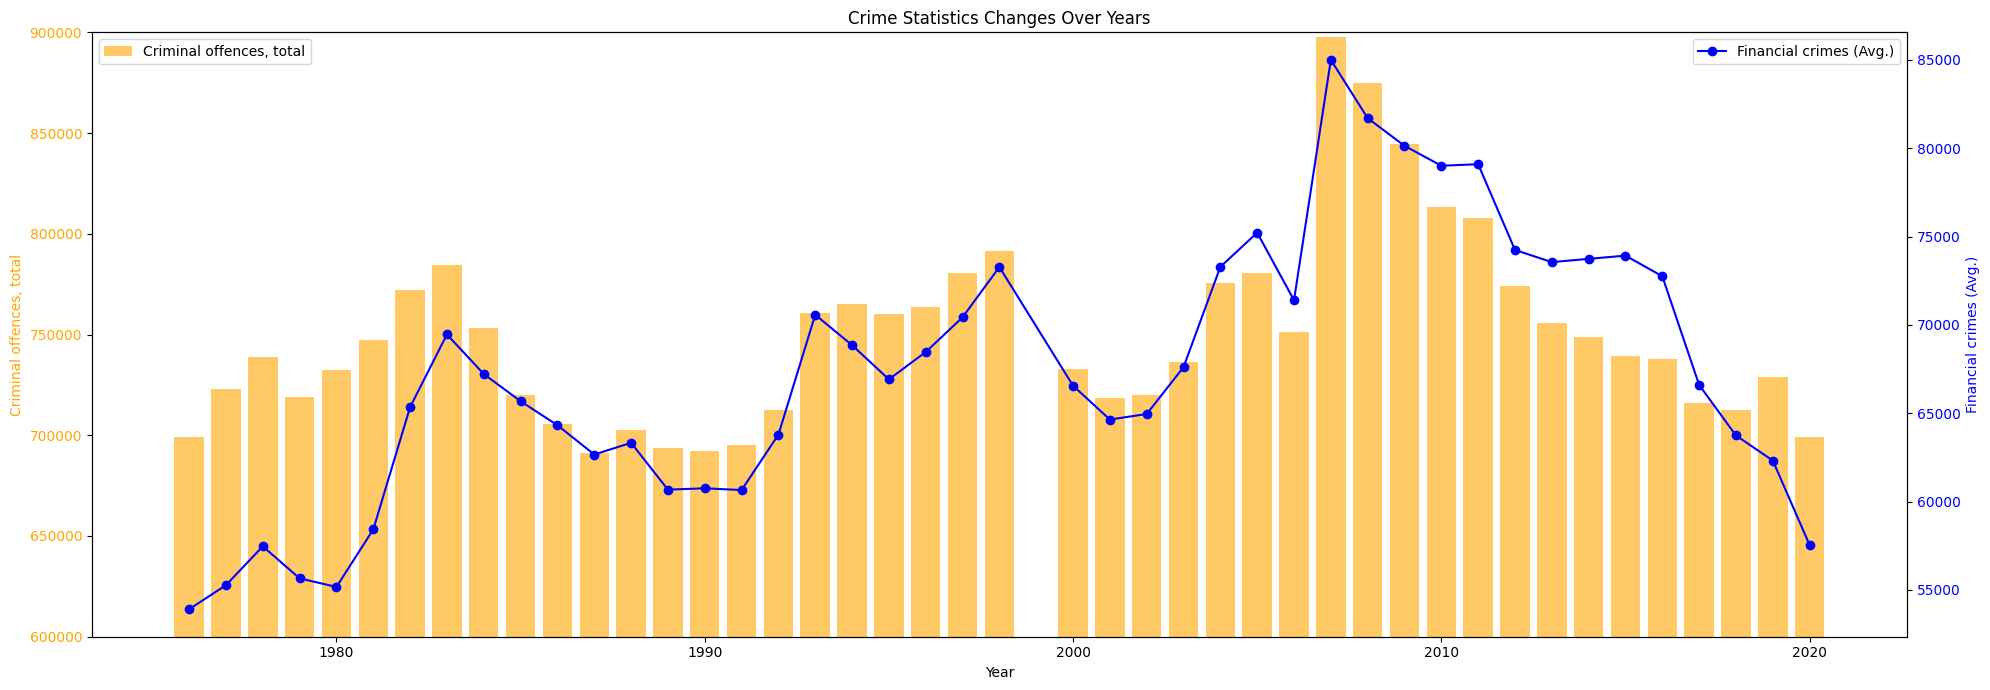

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


crime_data_e = pd.read_excel("crime_d_t.xlsx")
crime_data_e = crime_data_e.dropna()
crime_data_e.set_index('Years', inplace=True)


fig, ax1 = plt.subplots(figsize=(20, 7))


ax1.bar(crime_data_e.index, crime_data_e['Criminal offences, total'], label='Criminal offences, total', color='orange', alpha=0.6)


ax1.set_ylim(600000, 900000)


ax1.set_xlabel('Year')
ax1.set_ylabel('Criminal offences, total', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.set_title('Crime Statistics Changes Over Years')
ax1.legend(loc='upper left')


ax2 = ax1.twinx()
ax2.plot(crime_data_e.index, crime_data_e['Financial crimes (Avg.)'], label='Financial crimes (Avg.)', marker='o', color='blue')


ax2.set_ylabel('Financial crimes (Avg.)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper right')


plt.tight_layout()
plt.show()


Since above graph is showing crimes at levels, we illustrate data as percentage change over years as follows:

As we have many different types of the crimes, we firstly wanted to see which crimes are having similar patterns over years.

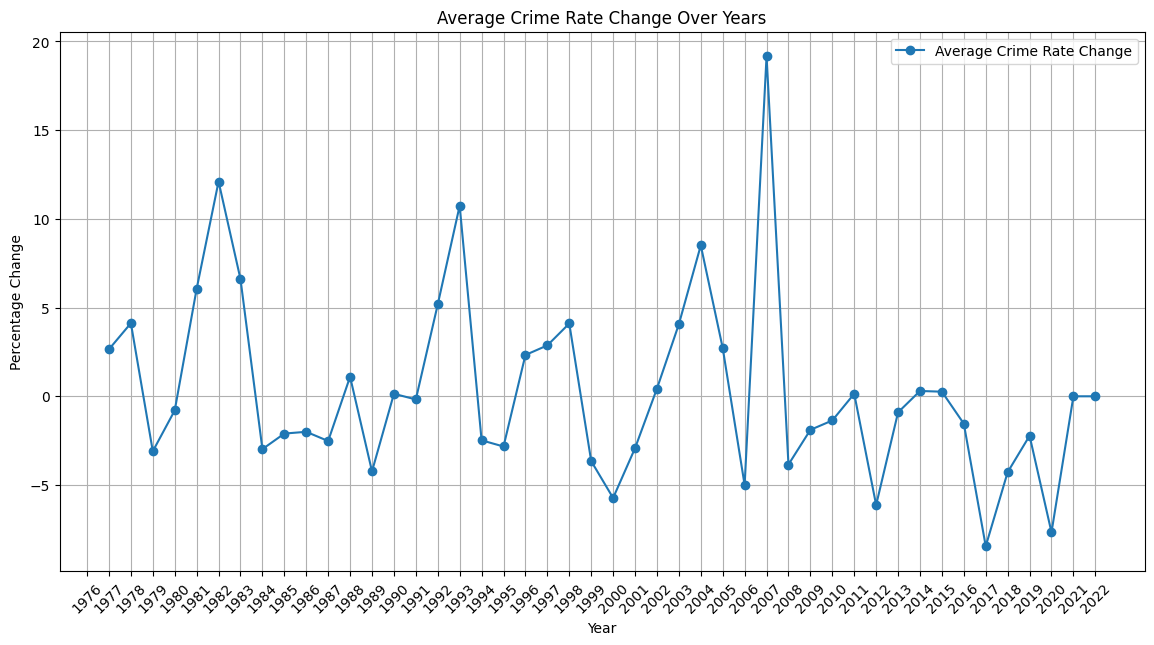

### 1. Clustering analysis
We make this analysis in order to see which type of the crimes have similar trends. We use random forest technique in the analysis.

---



In [ ]:
crime_data_e = pd.read_excel("data_crime_econ.xlsx")
crime_data_e = crime_data_e.dropna()
df = crime_data_e.drop(columns=['GDP (%)', 'inflation', 'Years', 'Criminal offences, total (%)'])

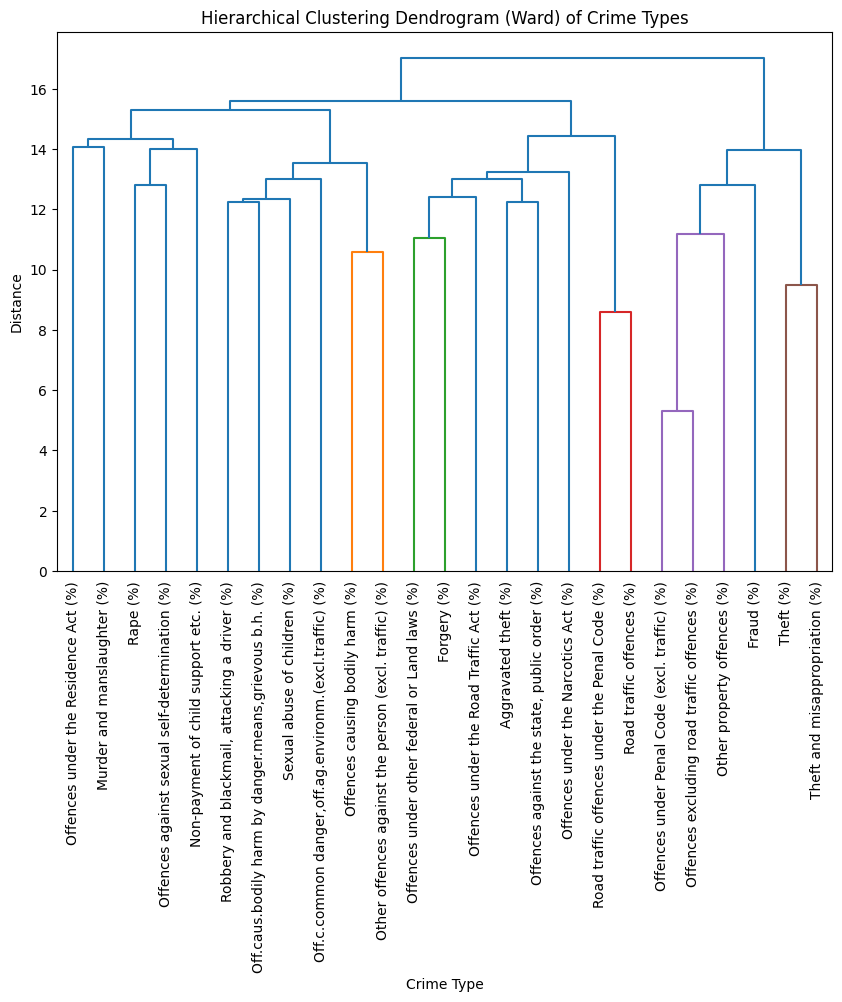

In [ ]:

crime_data_eco_cleaned = df.apply(pd.to_numeric, errors='coerce').fillna(df.mean())


embedder_by_type = RandomTreesEmbedding(n_estimators=100, random_state=42)
embedding_by_type = embedder_by_type.fit_transform(crime_data_eco_cleaned.T)


embedding_by_type_dense = embedding_by_type.todense()


linked_by_type = linkage(embedding_by_type_dense, 'ward')


plt.figure(figsize=(10, 7))
dendrogram(linked_by_type, orientation='top', labels=crime_data_eco_cleaned.columns, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward) of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()


Above cluster, we aim to see if financial related indicators (ie. theft, propoerty related crimes, fraud) are falling into similar cluster. We see towards to the right side of graph, we see that fraud, other property offences, theft and theft and misappropriation are having similar trends.

Furthermore, apart from the clusterin, we check visually finance related crimes below.

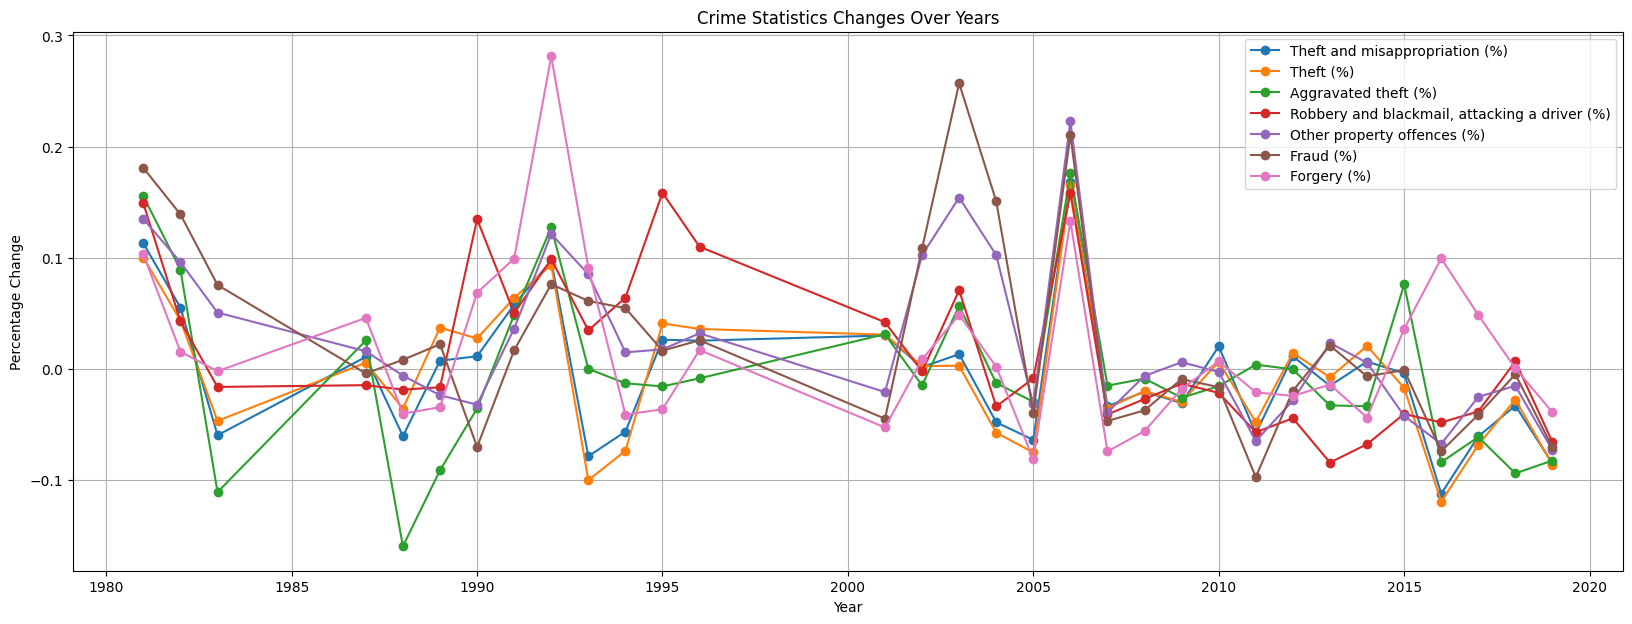

In [ ]:
crime_data_e = pd.read_excel("data_crime_econ.xlsx")
crime_data_e = crime_data_e.dropna()
crime_data_e.set_index('Years', inplace=True)


plt.figure(figsize=(20, 7))
plt.plot(crime_data_e.index, crime_data_e['Theft and misappropriation (%)'], label='Theft and misappropriation (%)', marker='o')
plt.plot(crime_data_e.index, crime_data_e['Theft (%)'], label='Theft (%)', marker='o')
plt.plot(crime_data_e.index, crime_data_e['Aggravated theft (%)'], label='Aggravated theft (%)', marker='o')
plt.plot(crime_data_e.index, crime_data_e['Robbery and blackmail, attacking a driver (%)'], label='Robbery and blackmail, attacking a driver (%)', marker='o')
plt.plot(crime_data_e.index, crime_data_e['Other property offences (%)'], label='Other property offences (%)', marker='o')
plt.plot(crime_data_e.index, crime_data_e['Fraud (%)'], label='Fraud (%)', marker='o')
plt.plot(crime_data_e.index, crime_data_e['Forgery (%)'], label='Forgery (%)', marker='o')

plt.title('Crime Statistics Changes Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()

Importantly we see correlation of finance related data with economic indicators with a heatmap if our hypothesis which is finance related crimes have correlation with economic issues:

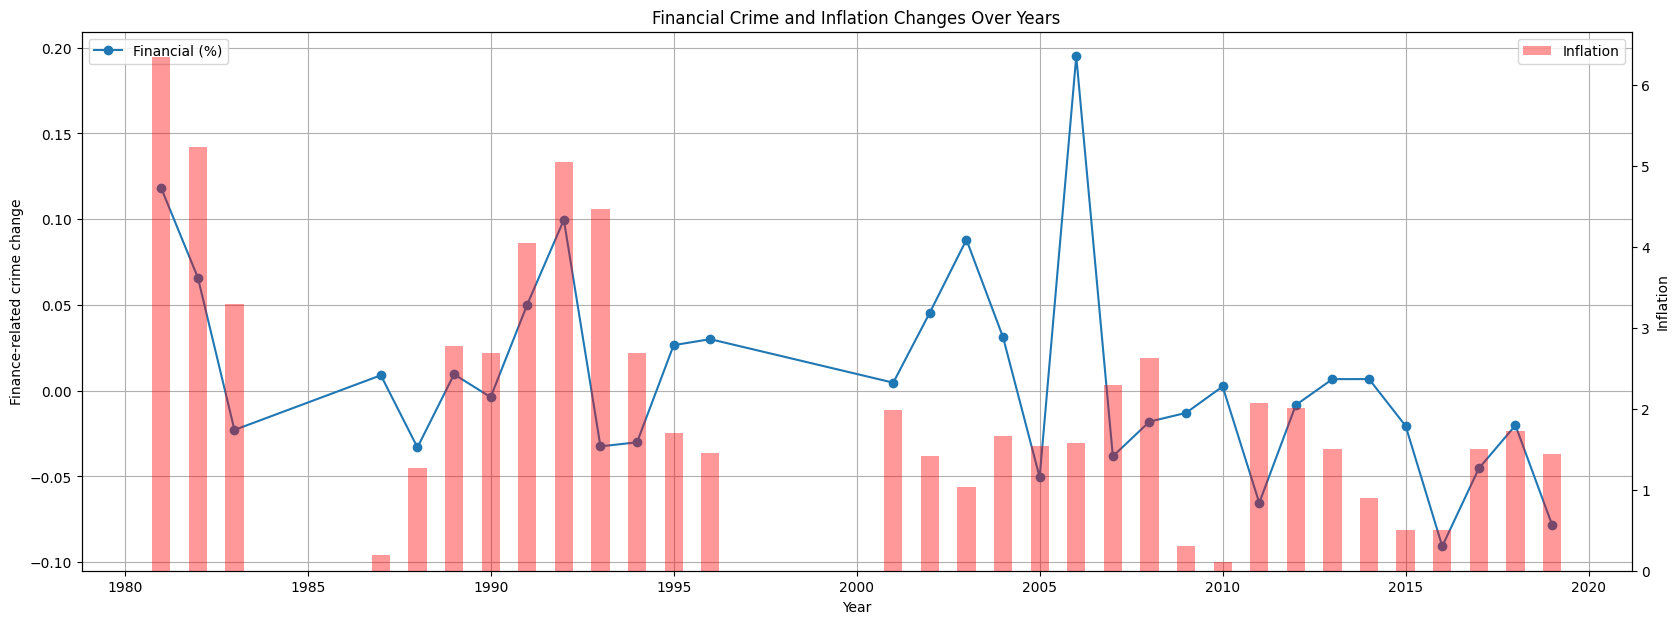

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

crime_data_e = pd.read_excel("data_crime_econ.xlsx")
crime_data_e = crime_data_e.dropna()
crime_data_e.set_index('Years', inplace=True)

fig, ax1 = plt.subplots(figsize=(20, 7))


ax1.plot(crime_data_e.index, crime_data_e['Financial (%)'], label='Financial (%)', marker='o')
#ax1.plot(crime_data_e.index, crime_data_e['Theft (%)'], label='Theft (%)', marker='o')
#ax1.plot(crime_data_e.index, crime_data_e['Aggravated theft (%)'], label='Aggravated theft (%)', marker='o')
#ax1.plot(crime_data_e.index, crime_data_e['Robbery and blackmail, attacking a driver (%)'], label='Robbery and blackmail, attacking a driver (%)', marker='o')
#ax1.plot(crime_data_e.index, crime_data_e['Other property offences (%)'], label='Other property offences (%)', marker='o')
#ax1.plot(crime_data_e.index, crime_data_e['Fraud (%)'], label='Fraud (%)', marker='o')
#ax1.plot(crime_data_e.index, crime_data_e['Forgery (%)'], label='Forgery (%)', marker='o')


ax1.set_xlabel('Year')
ax1.set_ylabel('Finance-related crime change')
ax1.set_title('Financial Crime and Inflation Changes Over Years')
ax1.legend(loc='upper left')
ax1.grid(True)


ax2 = ax1.twinx()
ax2.bar(crime_data_e.index, crime_data_e['inflation'], label='Inflation', color='red', alpha=0.4, width=0.5)


ax2.set_ylabel('Inflation')


ax2.legend(loc='upper right')


plt.show()


#OLS to see noise

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_ec = pd.read_excel("data_crime_econ.xlsx")
df_ = pd.read_excel("crime_d_t.xlsx")
df = df_.dropna()

In [30]:
import statsmodels.api as sm
y = df['Financial crimes (Avg.)']
x = df[['inflation']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

summary = model.summary()
print(summary)


                               OLS Regression Results                              
Dep. Variable:     Financial crimes (Avg.)   R-squared:                       0.223
Model:                                 OLS   Adj. R-squared:                  0.204
Method:                      Least Squares   F-statistic:                     11.76
Date:                     Wed, 24 Jan 2024   Prob (F-statistic):            0.00139
Time:                             19:48:36   Log-Likelihood:                -438.82
No. Observations:                       43   AIC:                             881.6
Df Residuals:                           41   BIC:                             885.2
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [31]:
import statsmodels.api as sm
y = df_ec['Financial (%)']
x = df_ec[['inflation']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model_2 = sm.OLS(y, x).fit()
summary2 = model_2.summary()
print(summary2)

                            OLS Regression Results                            
Dep. Variable:          Financial (%)   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     8.807
Date:                Wed, 24 Jan 2024   Prob (F-statistic):            0.00494
Time:                        19:48:42   Log-Likelihood:                 70.709
No. Observations:                  44   AIC:                            -137.4
Df Residuals:                      42   BIC:                            -133.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0254      0.013     -2.027      0.0

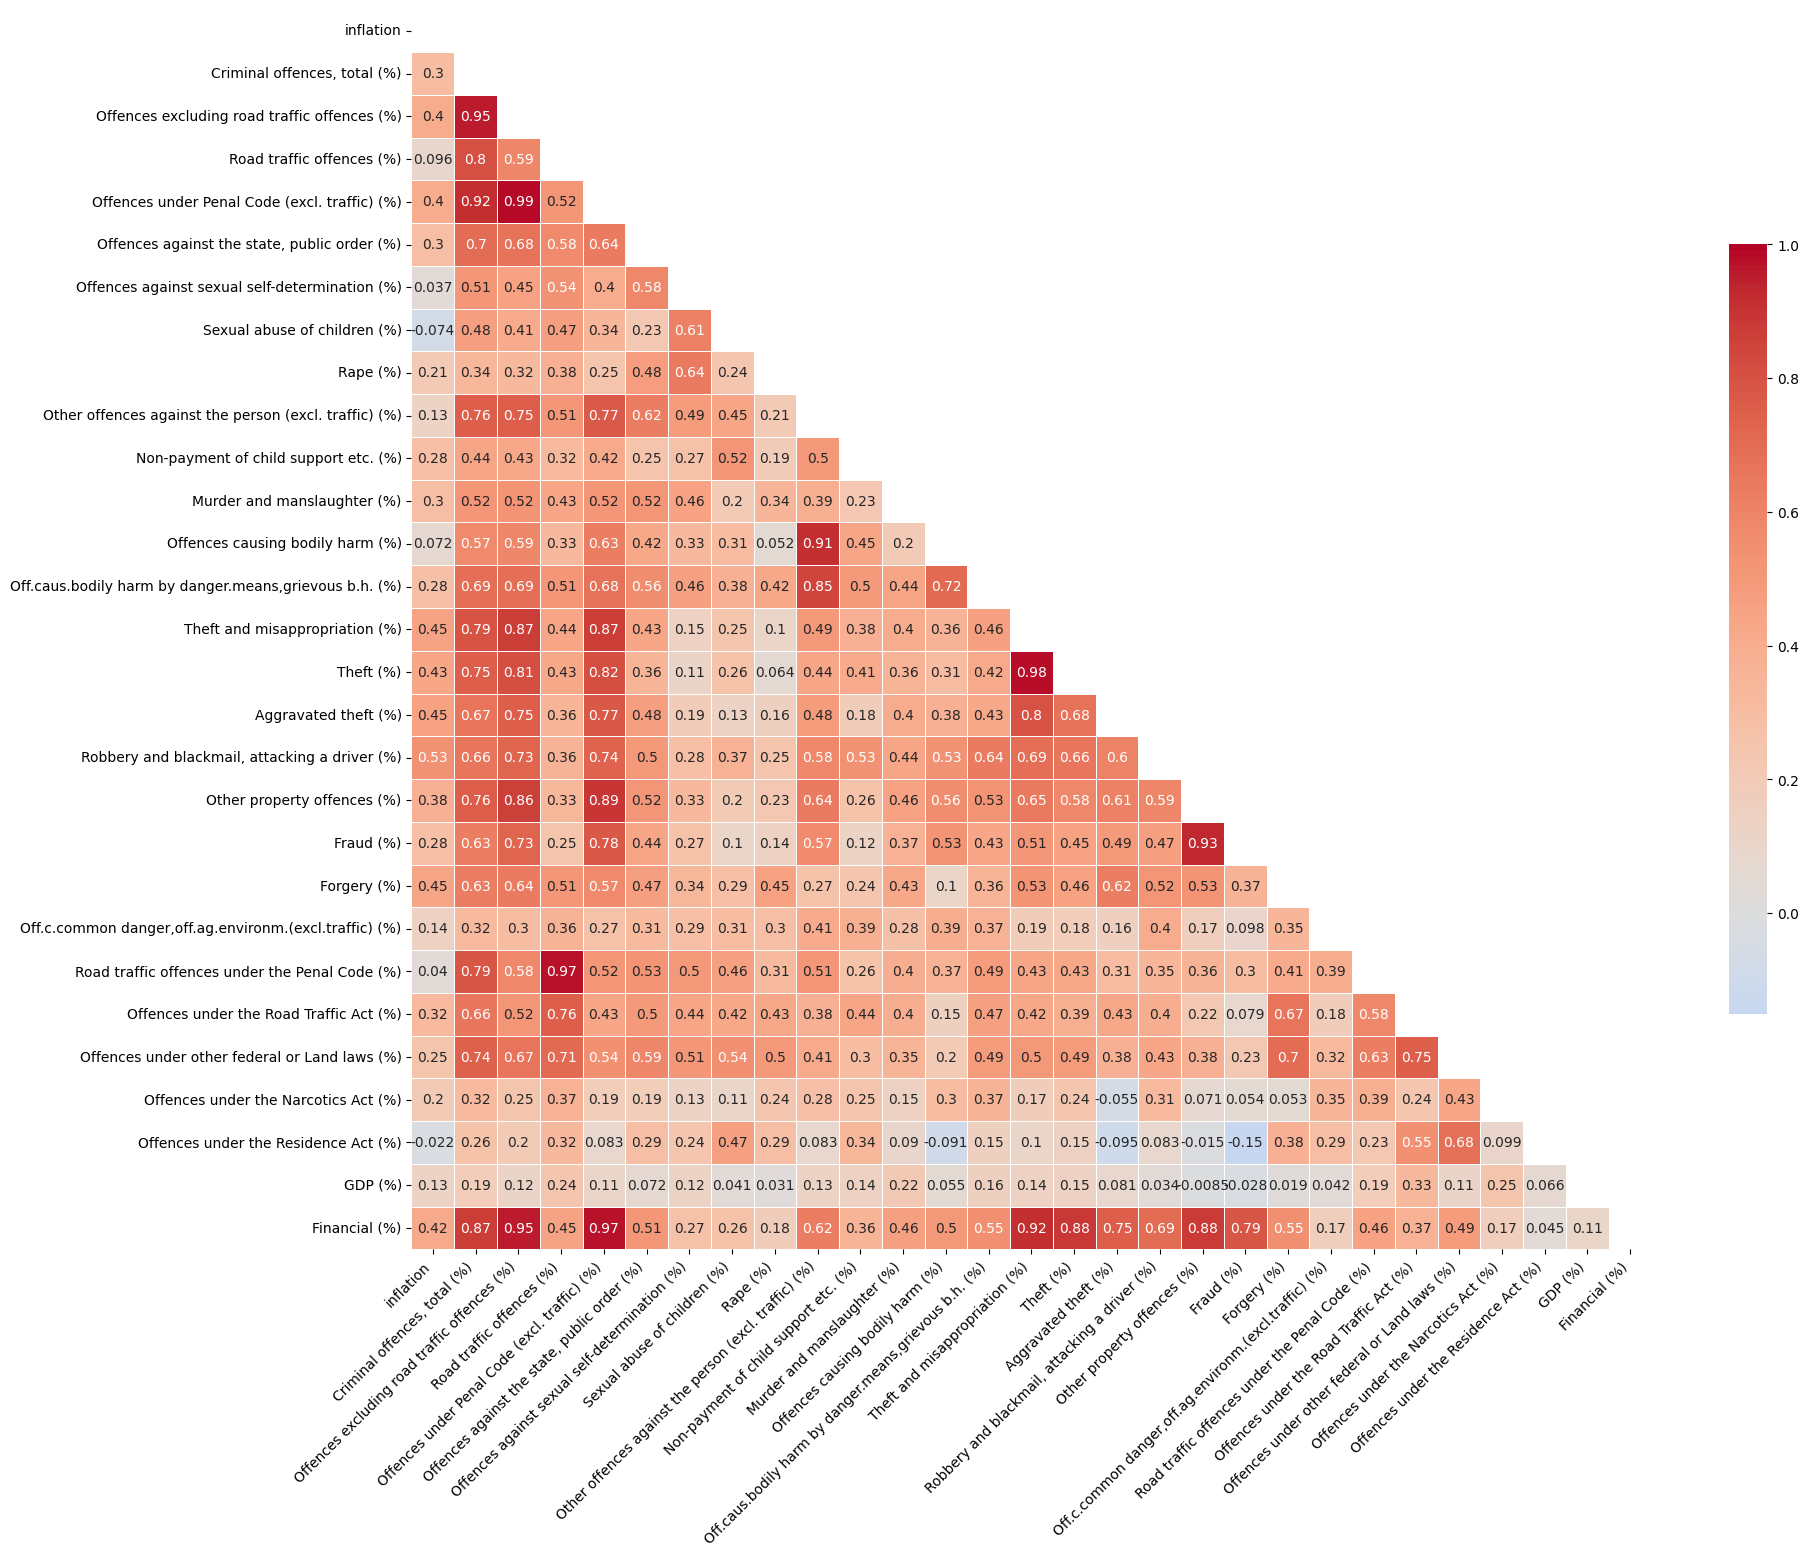

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel("data_crime_econ.xlsx")


df = df.drop(columns=['Years'])


correlation_matrix = df.corr()


mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


plt.figure(figsize=(20, 20))


sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


plt.xticks(rotation=45, ha='right')


plt.show()


We observe correlation between inflation and financial crimes correlation as 0.42. It is inline with our expectations.

We can visualize crimes in the first cluster

Two closely related crimes

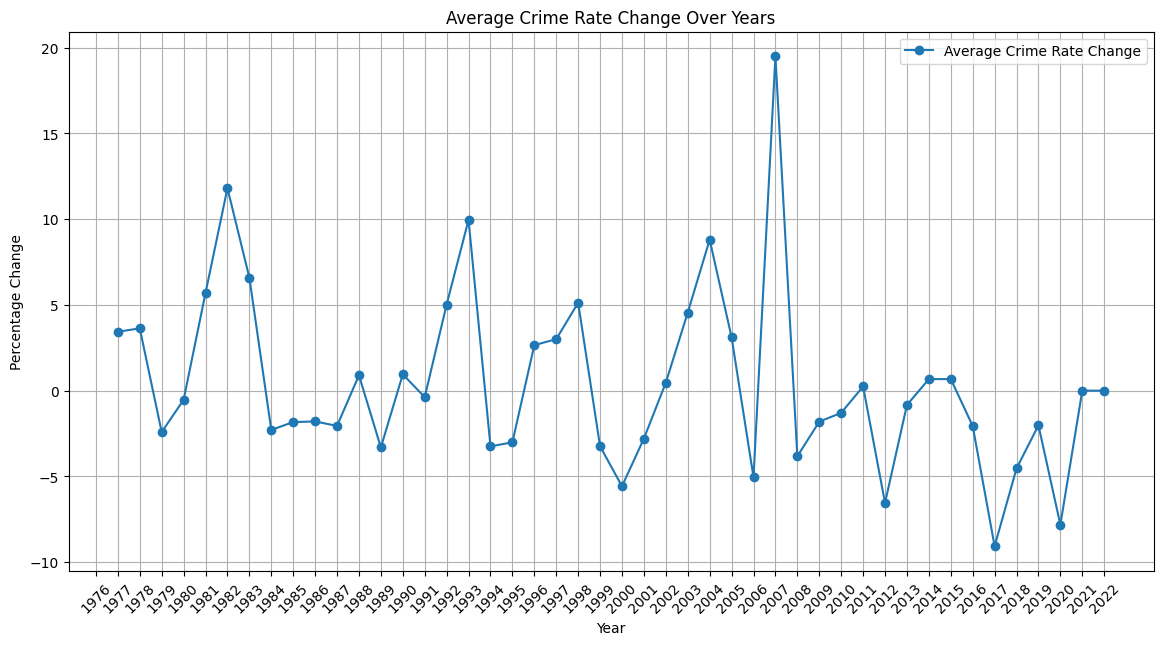

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

crime_data = pd.read_excel("data_crime.xlsx")
crime_data_transposed = crime_data.set_index('Type of criminal offence').transpose()
crime_data_transposed_cleaned = crime_data_transposed.apply(pd.to_numeric, errors='coerce')


crime_data_transposed_cleaned = crime_data_transposed_cleaned.dropna(axis=1, how='all')


selected_crimes = ['Theft and misappropriation', 'Theft', 'Other property offences',
                   'Fraud']
crime_data_transposed_cleaned['Average Crime Rate'] = crime_data_transposed_cleaned[selected_crimes].mean(axis=1)


crime_data_transposed_cleaned['Avg Crime Rate Change'] = crime_data_transposed_cleaned['Average Crime Rate'].pct_change() * 100

plt.figure(figsize=(14, 7))
plt.plot(crime_data_transposed_cleaned.index, crime_data_transposed_cleaned['Avg Crime Rate Change'], label='Average Crime Rate Change', marker='o')

plt.title('Average Crime Rate Change Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
